In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential

from keras.layers import Dense ,Conv1D,MaxPool1D,Flatten,Dropout,LSTM
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
import tensorflow as tf

In [9]:
data=pd.read_csv("./combined_data.csv")
Y=list((np.array(data["187"])))
class_names=['normal','abnormal']
data.drop(["187"],inplace=True,axis=1)
X=data



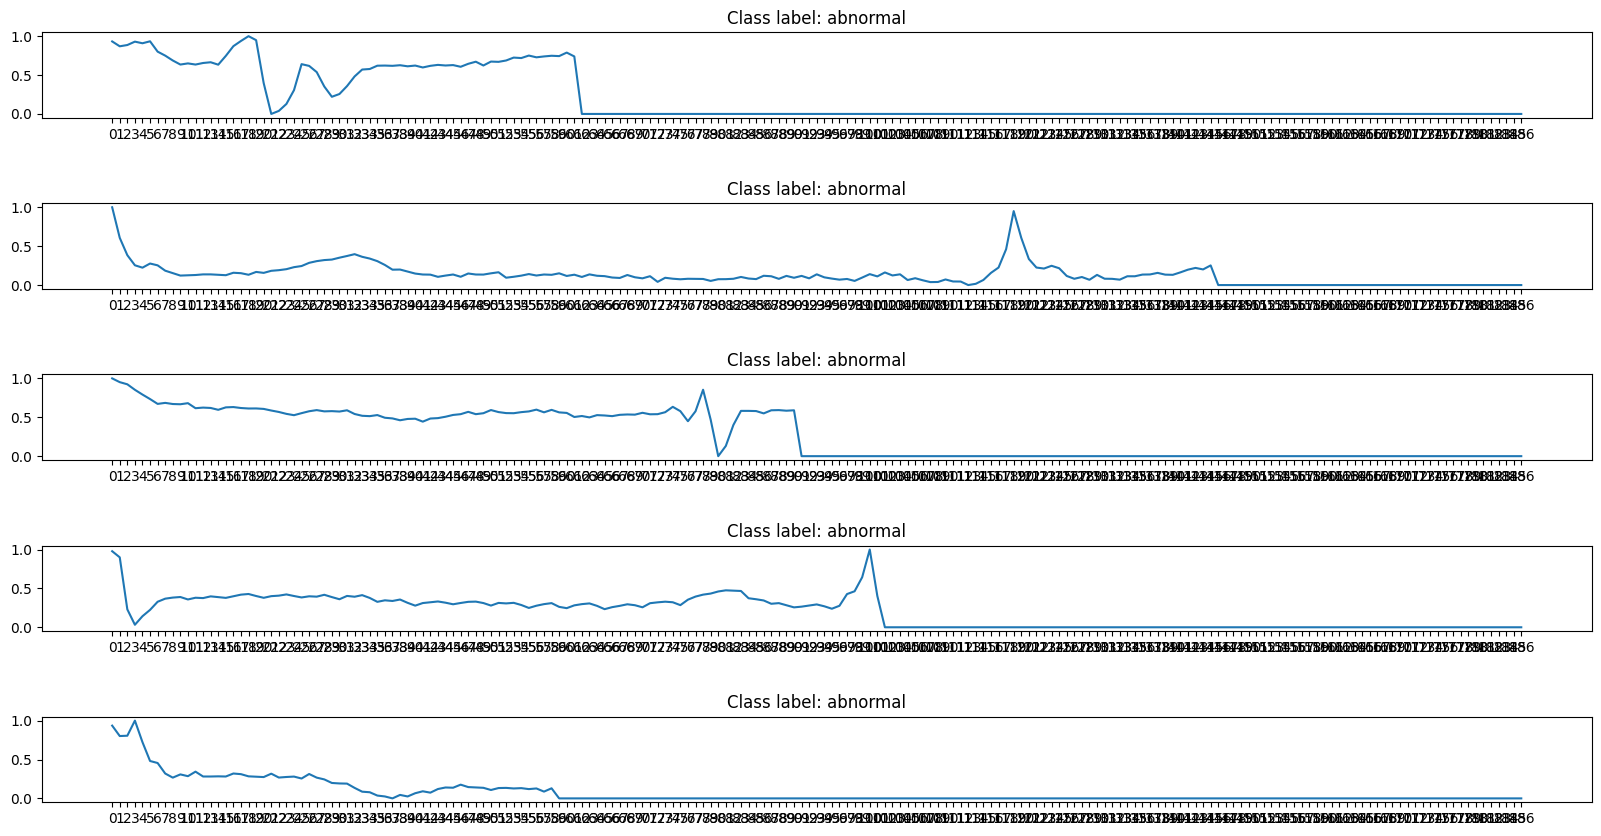

In [10]:
fig,ax=plt.subplots(5,1,figsize=(20,10))
plt.subplots_adjust(hspace=1)
for i in range(5):
    ax[i].plot(X.iloc[i, :])
    ax[i].set_title(f'Class label: {class_names[Y[i]]}')
plt.show()
    

In [11]:

Y=np.array(Y)
X=np.array(X)
print(X.shape)
X=X.reshape(-1,187,1)

X.shape
Y.shape

(14552, 187)


(14552,)

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=43)
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)
# list(Y_test)
test_lables=Y_test
Y_test=to_categorical(Y_test)
Y_train=to_categorical(Y_train)
Y_val=to_categorical(Y_val)

In [13]:
model = Sequential()
model.add(Conv1D(128, 5, activation='relu', input_shape=(187, 1)))
model.add(MaxPool1D(pool_size=2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))


In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
x=model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=100,batch_size=100)
print("Testing the model")
scores = model.evaluate(X_test, Y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
# model.summary()

Epoch 1/100
94/94 [==============================] - 4s 30ms/step - loss: 0.4355 - accuracy: 0.7865 - val_loss: 0.3854 - val_accuracy: 0.8094
Epoch 2/100
94/94 [==============================] - 3s 29ms/step - loss: 0.3170 - accuracy: 0.8637 - val_loss: 0.2891 - val_accuracy: 0.8789
Epoch 3/100
94/94 [==============================] - 3s 28ms/step - loss: 0.2619 - accuracy: 0.8887 - val_loss: 0.2675 - val_accuracy: 0.8905
Epoch 4/100
94/94 [==============================] - 3s 29ms/step - loss: 0.2202 - accuracy: 0.9108 - val_loss: 0.2291 - val_accuracy: 0.9043
Epoch 5/100
94/94 [==============================] - 3s 30ms/step - loss: 0.1827 - accuracy: 0.9298 - val_loss: 0.1428 - val_accuracy: 0.9450
Epoch 6/100
94/94 [==============================] - 3s 29ms/step - loss: 0.1428 - accuracy: 0.9474 - val_loss: 0.1314 - val_accuracy: 0.9506
Epoch 7/100
94/94 [==============================] - 3s 29ms/step - loss: 0.1145 - accuracy: 0.9573 - val_loss: 0.1443 - val_accuracy: 0.9463
Epoch 

91/91 [==============================] - 1s 4ms/step
Test Accuracy: 99.35%


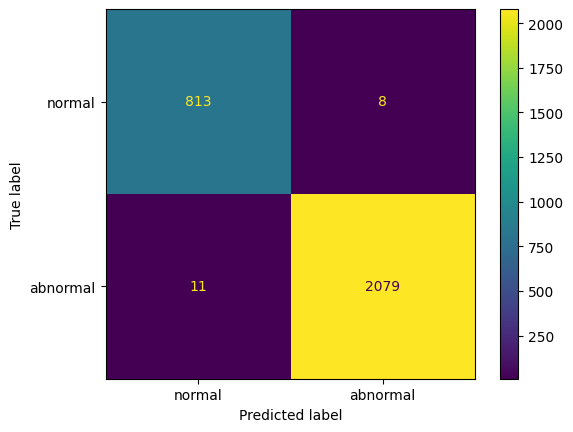

In [15]:
predictions=model.predict(X_test)
predicted_labels=np.argmax(predictions,axis=1)
cm=confusion_matrix(test_lables,predicted_labels)
test_accuracy = accuracy_score(test_lables, predicted_labels)
print("Test Accuracy: {:.2%}".format(test_accuracy))
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()
plt.show()